## Linear AutoEncoder for PCA

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
df = pd.read_csv('anonymized_data.csv')

In [3]:
df.head()

,EJWY,VALM,EGXO,HTGR,SKRF,NNSZ,NYLC,GWID,TVUT,CJHI,NVFW,VLBG,IDIX,UVHN,IWOT,LEMB,QMYY,XDGR,ODZS,LNJS,WDRT,LKKS,UOBF,VBHE,FRWU,NDYZ,QSBO,JDUB,TEVK,EZTM,Label
0,-2.032145,1.019576,-9.658715,-6.210495,3.156823,7.457850,-5.313357,8.508296,3.959194,-5.246654,0.454458,-3.855839,-6.248326,4.934422,10.008317,-4.298336,-8.814638,3.817839,2.896091,-5.350594,4.048589,-2.209663,-10.340123,-7.697555,-5.932752,10.872688,0.081321,1.276316,5.281225,-0.516447,0.0
1,8.306217,6.649376,-0.960333,-4.094799,8.738965,-3.458797,7.016800,6.692765,0.898264,9.337643,-9.003987,-8.940399,6.156711,9.587159,-6.242118,-3.958827,2.793432,-6.120728,5.127779,-2.374059,4.341376,0.851793,-9.678324,-6.071795,1.428194,-8.082792,-0.557089,-7.817282,-8.686722,-6.953100,1.0
2,6.570842,6.985462,-1.842621,-1.569599,10.039339,-3.623026,8.957619,7.577283,1.541255,7.161509,-7.163735,-7.004002,4.678410,9.168494,-7.139517,-4.774317,4.358969,-6.179764,4.207522,0.508184,4.028944,1.376085,-8.971164,-5.302191,2.898965,-8.746597,-0.520888,-7.350999,-8.925501,-7.051179,1.0
3,-1.139972,0.579422,-9.526530,-5.744928,4.834355,5.907235,-4.804137,6.798810,5.403670,-7.642857,1.430195,-0.991499,-5.153022,5.491574,9.525384,-7.426677,-8.496024,2.671595,4.386845,-4.692552,3.974559,0.270571,-8.640988,-8.105419,-5.079015,9.351282,0.641759,1.898083,3.904671,1.453499,0.0
4,-1.738104,0.234729,-11.558768,-7.181332,4.189626,7.765274,-2.189083,7.239925,3.135602,-6.211390,-1.132032,-3.827855,-5.659445,4.374395,8.222426,-6.008160,-8.804945,4.699459,3.988987,-4.276795,3.799633,-0.013973,-9.437110,-6.475267,-5.708377,9.623080,1.802899,1.903705,4.188442,1.522362,0.0


In [4]:
df.shape

(500, 31)

In [0]:
from sklearn.preprocessing import MinMaxScaler

In [0]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df.drop('Label', axis = 1))

### Linear AutoEncoder

In [0]:
import tensorflow as tf

In [0]:
num_inputs = 30
num_hidden = 2
num_outputs = num_inputs

learning_rate = 0.01

In [0]:
x = tf.placeholder(tf.float32, shape = [None, num_inputs])

In [10]:
hidden = tf.contrib.layers.fully_connected(x, num_hidden, activation_fn = None)

W0619 21:25:09.031272 139697213601664 lazy_loader.py:50] 
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



In [0]:
outputs = tf.contrib.layers.fully_connected(hidden, num_outputs, activation_fn = None)

In [0]:
loss = tf.reduce_mean(tf.square(outputs-x))

In [0]:
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
train = optimizer.minimize(loss)

### Session

In [0]:
init = tf.global_variables_initializer()

In [0]:
num_steps = 1000
with tf.Session() as sess:
    sess.run(init)
    
    for iteration in range(num_steps):
        sess.run(train, {x: scaled_data})

In [0]:
with tf.Session() as sess:
    sess.run(init)
    
    output_2d = sess.run(hidden, {x: scaled_data})

In [17]:
type(output_2d)

numpy.ndarray

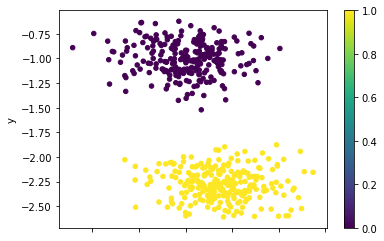

In [21]:
pd.DataFrame(data=output_2d, columns=['x', 'y']).plot(kind='scatter', x='x', y='y', c = df['Label'], colormap='viridis')
